 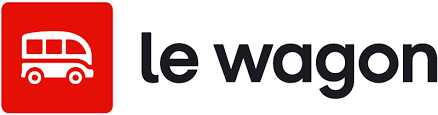


# Digital marketing analysis

In this challenge, we will analyze the digital marketing strategy of Shapr.


## **Load data**



Download and upload [`acquisition_facebook_adds.csv`](https://drive.google.com/file/d/1U4bXgai8KiEWLomvYqMAF-D-0zeKfU_l/view?usp=sharing) file in Google Colab.


Load `acquisition_facebook_adds.csv` data in a DataFrame named `df_facebook`.


In [2]:
#your code here
import pandas as pd

df_facebook = pd.read_csv('acquisition_facebook_adds.csv')

## **Data Discovery**


Print `df_facebook` DataFrame.


In [3]:
#your code here
df_facebook

,date,channel,spend
0,2019-08-01,Media,91.80
1,2019-08-01,Media,44.42
2,2019-08-01,Media,41.98
3,2019-08-01,Facebook,7.02
4,2019-08-01,Facebook,1.09
...,...,...,...
73626,2019-01-18,Media,59.66
73627,2019-01-18,Media,126.23
73628,2019-01-18,Media,10.82
73629,2019-01-18,Media,13.90


How many rows and columns are in this DataFrame ?


In [ ]:
#your code here
print(f'There is {len(df_facebook)} rows.')
print(f'There is {len(df_facebook.columns)} columns.')

There is 73631 rows.
There is 3 columns.


### **Columns selection**

Select only `date` and `spend` columns of this DataFrame and save the result in a `df_facebook_date_spend` variable.


In [5]:
#your code here
df_facebook_date_spend = df_facebook[['date', 'spend']]
df_facebook_date_spend

,date,spend
0,2019-08-01,91.80
1,2019-08-01,44.42
2,2019-08-01,41.98
3,2019-08-01,7.02
4,2019-08-01,1.09
...,...,...
73626,2019-01-18,59.66
73627,2019-01-18,126.23
73628,2019-01-18,10.82
73629,2019-01-18,13.90


### **Filtering**


f) Filter the `df_facebook` DataFrame only on the **Media** channel and save the result in a `df_facebook_media` variable.

In [6]:
#your code here
df_facebook_media = df_facebook[df_facebook['channel'] == 'Media']
df_facebook_media

,date,channel,spend
0,2019-08-01,Media,91.80
1,2019-08-01,Media,44.42
2,2019-08-01,Media,41.98
81,2019-08-01,Media,32.09
150,2019-08-01,Media,32.89
...,...,...,...
73626,2019-01-18,Media,59.66
73627,2019-01-18,Media,126.23
73628,2019-01-18,Media,10.82
73629,2019-01-18,Media,13.90


Filter the `df_facebook` DataFrame on the **Instagram** channel on January 13, 2019.


Save the result in a variable `df_facebook_instagram_20190113`, and export this DataFrame to a csv file named`acquisition_facebook_instagram_20190113.csv`.

In [10]:
#create the dataframe
df_facebook_instagram_20190113 = df_facebook[(df_facebook['channel'] == 'Instagram') & (df_facebook['date'] ==  '2019-01-13')]
df_facebook_instagram_20190113

,date,channel,spend
6415,2019-01-13,Instagram,0.00
6423,2019-01-13,Instagram,0.02
6438,2019-01-13,Instagram,7.69
6454,2019-01-13,Instagram,6.41
6471,2019-01-13,Instagram,7.43
...,...,...,...
12529,2019-01-13,Instagram,2.53
12546,2019-01-13,Instagram,0.83
12561,2019-01-13,Instagram,0.64
12575,2019-01-13,Instagram,0.03


In [11]:
#export to csv
df_facebook_instagram_20190113.to_csv('acquisition_facebook_instagram_20190113.csv')

## **Data Analysis**


### **Cast a date column to datetime**


Convert the `date` column of the `df_facebook` DataFrame to datetime (a Python type for dates).

We'll use the `pd.to_datetime()` function to do this.

Have a look at the syntax in the course. Which **format** should you use here?

In [13]:
#your code here
df_facebook['date'] = pd.to_datetime(df_facebook['date'])
print(df_facebook['date'].info)

<bound method Series.info of 0       2019-08-01
1       2019-08-01
2       2019-08-01
3       2019-08-01
4       2019-08-01
           ...    
73626   2019-01-18
73627   2019-01-18
73628   2019-01-18
73629   2019-01-18
73630   2019-01-18
Name: date, Length: 73631, dtype: datetime64[ns]>


### **Aggregate functions**


Over what time period does the data extend?  
You can use the `.min()` and `.max()` aggregation functions on the `date` column.

In [14]:
#your code here
print(f'The data is from {df_facebook['date'].min()} to {df_facebook['date'].max()}')

The data is from 2019-01-01 00:00:00 to 2019-10-18 00:00:00


Over the whole period, how much did Shapr spend?

In [21]:
#your code here
print(f'Shapr spend {df_facebook['spend'].sum()}')

Shapr spend 1811170.169857


Calculate the amount of money spent by Shapr day by day.

To do this we will use the `.groupby()` function and then the `.sum()` aggregation function on the `spend` column.

We will store the result in a `df_facebook_daily` variable. You can refer to the lecture for syntax.


**Use the argument as_index=False to get a DataFrame as result**.

In [24]:
#your code here
df_facebook_daily = df_facebook.groupby('date', as_index=False)['spend'].sum()
print(df_facebook_daily)

          date        spend
0   2019-01-01  4082.340000
1   2019-01-02  4737.440000
2   2019-01-03  5838.160000
3   2019-01-04  7793.200000
4   2019-01-05  8572.060000
..         ...          ...
286 2019-10-14   274.900000
287 2019-10-15   285.210008
288 2019-10-16   310.230002
289 2019-10-17   297.490002
290 2019-10-18    67.180000

[291 rows x 2 columns]


We would like to extend the analysis by looking at the marketing spend strategy by channel over time.  


Calculate the amount spent per day per channel. We will store the result in a variable `df_facebook_channel_daily`.

**Use the argument as_index=False again to get a DataFrame as a result**

In [25]:
#your code here
df_facebook_channel_daily = df_facebook.groupby(['date', 'channel'], as_index=False)['spend'].sum()
print(df_facebook_channel_daily)

          date    channel        spend
0   2019-01-01   Facebook   706.210000
1   2019-01-01  Instagram  1406.140000
2   2019-01-01      Media  1969.990000
3   2019-01-02   Facebook   860.150000
4   2019-01-02  Instagram  1524.340000
..         ...        ...          ...
868 2019-10-17  Instagram   146.470000
869 2019-10-17      Media    48.170002
870 2019-10-18   Facebook    15.930000
871 2019-10-18  Instagram    28.870000
872 2019-10-18      Media    22.380000

[873 rows x 3 columns]


We want to display these values in a graph.

Execute the code below to achieve this (we will have a specific lecture on Data Viz with Python later in the bootcamp)

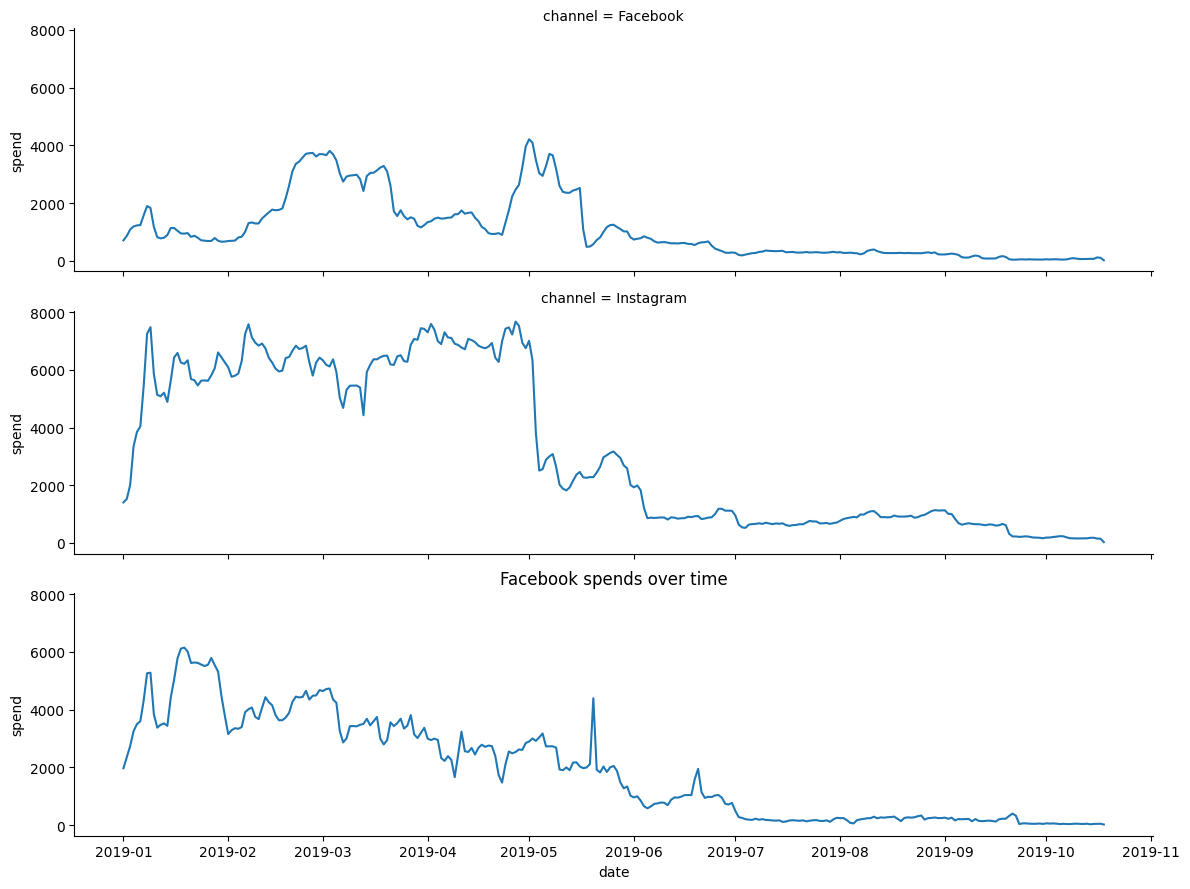

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(kind="line",
            data=df_facebook_channel_daily,
            x="date",
            y="spend",
            row="channel",
            height=3,
            aspect=12/3)
plt.xlabel("date")
plt.ylabel("spend")
plt.title("Facebook spends over time")
plt.show()

## **Data Wrangling**


### **Join two dataframes**


Load the file [`social_network_taxes.csv`](https://drive.google.com/file/d/1Lleeq3STLbX_wL6j6jNwlFt5eJRrIrAF/view?usp=sharing) into a `df_taxes` DataFrame and display it.


This represents the fee applied by each of the social networks as a tax  (not real numbers). \
**I.e.** for a fee of 0.10, if you invest 100 (spend=100), the social network takes 10 as tax.

In [31]:
#your code here
df_taxes = pd.read_csv('social_network_taxes.csv')
df_taxes

,channel,tax
0,Instagram,0.20
1,Facebook,0.15
2,Media,0.10


Merge the two DataFrames `df_facebook` and `df_taxes` and store the result in a variable `df_facebook_merged`.

Display `df_facebook_merged`, which new column has just appeared?

Look at the syntax in your course.

In [33]:
#your code here
df_facebook_merged = df_facebook.merge(df_taxes, how='left', on='channel')
df_facebook_merged

,date,channel,spend,tax
0,2019-08-01,Media,91.80,0.10
1,2019-08-01,Media,44.42,0.10
2,2019-08-01,Media,41.98,0.10
3,2019-08-01,Facebook,7.02,0.15
4,2019-08-01,Facebook,1.09,0.15
...,...,...,...,...
73626,2019-01-18,Media,59.66,0.10
73627,2019-01-18,Media,126.23,0.10
73628,2019-01-18,Media,10.82,0.10
73629,2019-01-18,Media,13.90,0.10


Create a new column in `df_facebook_merged` that corresponds to the spend column minus the tax.

We'll call this column `real_spend`.

<details>
    <summary> Hint 💡 </summary>
You can use the columns in a DataFrame as variables for doing arithmetic operations.
</details>


In [35]:
#your code here
df_facebook_merged['real_spend'] = df_facebook_merged['spend'] - df_facebook_merged['tax']
print(df_facebook_merged)

            date   channel   spend   tax  real_spend
0     2019-08-01     Media   91.80  0.10       91.70
1     2019-08-01     Media   44.42  0.10       44.32
2     2019-08-01     Media   41.98  0.10       41.88
3     2019-08-01  Facebook    7.02  0.15        6.87
4     2019-08-01  Facebook    1.09  0.15        0.94
...          ...       ...     ...   ...         ...
73626 2019-01-18     Media   59.66  0.10       59.56
73627 2019-01-18     Media  126.23  0.10      126.13
73628 2019-01-18     Media   10.82  0.10       10.72
73629 2019-01-18     Media   13.90  0.10       13.80
73630 2019-01-18     Media  179.68  0.10      179.58

[73631 rows x 5 columns]
